Import

In [1]:
import numpy as np
import cv2 
import random
import math
from matplotlib import pyplot as plt
import random

global im#ratios
img = cv2.imread("spiral.jpg")
#img = cv2.imread("lines.jpg")
#img = cv2.imread("mario.png")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
tvalrange = [1,50]
rows = img.shape[0]
columns = img.shape[1]
ratios=[]


Smooth image

Text(0.5, 1.0, 'Smoothing image')

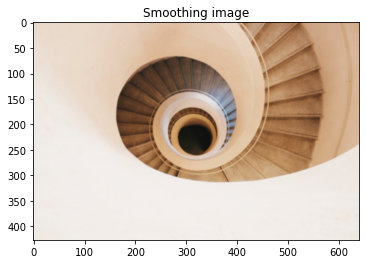

In [2]:
RGBimg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
dstimg = cv2.GaussianBlur(RGBimg,(3,3),0)
plt.imshow(dstimg)
plt.title("Smoothing image")

Get Sobel Horizontal and vertical images

In [3]:
dstimg = cv2.GaussianBlur(gray,(5,5),7)
G_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
G_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])  
dstx = cv2.filter2D(dstimg,cv2.CV_16S,G_x)
dsty = cv2.filter2D(dstimg,cv2.CV_16S,G_y)

Text(0.5, 1.0, 'Sobel Horizontal Image')

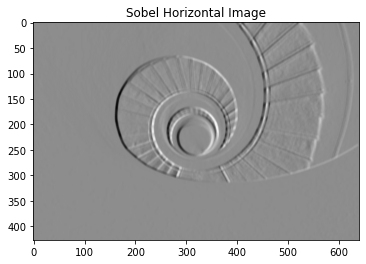

In [4]:
plt.imshow(dstx,cmap="gray")
plt.title("Sobel Horizontal Image")

Text(0.5, 1.0, 'Sobel Vertical Image')

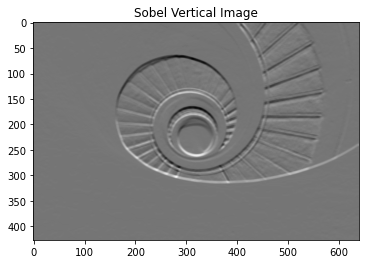

In [5]:
plt.imshow(dsty,cmap="gray")
plt.title("Sobel Vertical Image")

Get gradient image

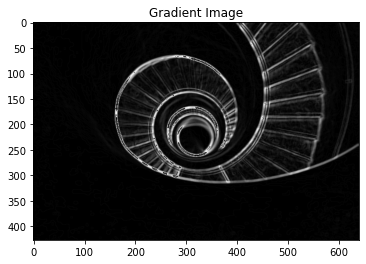

In [6]:
def GeneralEdgeDetection(img):
    rows = img.shape[0]
    columns = img.shape[1]
    Gimg = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    for x in range(rows):
        for y in range(columns):
            Gimg[x][y] = abs(dstx[x][y])+ abs(dsty[x][y])
    return Gimg
plt.imshow(GeneralEdgeDetection(dstimg))
plt.title("Gradient Image")

dstimg = dstx + dsty

Show the gradient image and Marked the Gradient image, Canny edge detection

Text(0.5, 1.0, 'Gredient image, tau=18 ')

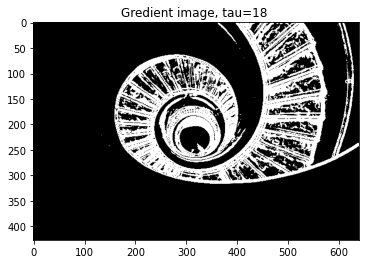

In [7]:
global tau,tau1,tau2,Gimg
tau = 0
tau1 = 0
tau2 = 0

Gimg = GeneralEdgeDetection(dstimg)


rows = img.shape[0] 
columns = img.shape[1]

def tau_val_trackbar(*arg):
    # global tau
    tau = cv2.getTrackbarPos("value of tau", "MarkGrad")

def tau_val_trackbar2(*arg):
    global tau1,tau2
    tau1 = cv2.getTrackbarPos("value of tau1", "Canny Edge Detection")
    tau2 = cv2.getTrackbarPos("value of tau2", "Canny Edge Detection")

def storeGimg(img):  
    for x in range(rows):
        for y in range(columns):
            img[x][y] = resGimg[x][y]
            
def MarkGrad(img,tau):
    temp = np.zeros((rows,columns),np.uint8)
    for x in range(rows):
        for y in range(columns):
            for z in range(3):
                if(img[x,y,z] >= tau):
                    temp[x,y] = np.uint8(255)
    return temp


def CED(img,tau1,tau2):
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Gaussianimg = cv2.GaussianBlur(imgGray,(5,5),7) 
    ced = cv2.Canny(Gaussianimg, tau1, tau2)
    cv2.imshow("Canny Edge Detection", ced)
    return ced

def activeGeneral(dstimg):
    tau = cv2.getTrackbarPos("value of tau", "MarkGrad")
    Gimg = GeneralEdgeDetection(dstimg)
    Gimg = MarkGrad(Gimg,tau)
    plt.figure(figsize=(10,3))
    cv2.imshow("MarkGrad",Gimg)
    plt.subplot(1,1,1),plt.imshow(Gimg,cmap ='gray')
    plt.title("Gredient image, tau= "+str(tau))

def activeCanny():
    tau1 = cv2.getTrackbarPos("value of tau1", "Canny Edge Detection")
    tau2 = cv2.getTrackbarPos("value of tau2", "Canny Edge Detection")
    ced = CED(img,tau1,tau2)
    
    plt.subplot(2,1,1),plt.imshow(ced,cmap ='gray')
    plt.title("Canny edge detection"+"\n"+"tau1= "+str(tau1)+" ,tau2 = "+str(tau2))

Markimg = MarkGrad(Gimg,18)
plt.imshow(Markimg,cmap ='gray')
plt.title("Gredient image, tau=18 ")

Text(0.5, 1.0, 'Canny edge detection, tau1= 7,tau2 = 51')

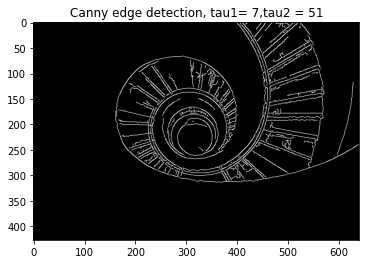

In [8]:
ced = CED(img,7,51)
plt.imshow(ced,cmap ='gray')
plt.title("Canny edge detection, tau1= 7,tau2 = 51")

Part3 Compare (Please press enter for "MarkGredient", "q" for Canny, and "c" to calculate ratio. after all the ratios have 
been calculated, press "esc" to show the figures.

In [ ]:
def Compare(img1,img2):
    countgimg = 0
    volume = rows * columns
    ratio = 0
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
                if(img1[i,j] == img2[i,j]):
                    countgimg = countgimg+1
    ratio = countgimg  / volume
    return ratio                                #get the ratio 



def CompareMetricPlt(x, y, xLabel, yLabel,dataLabel,title):
    plt.figure(dpi=200)
    plt.figure(figsize=(5,5))
    mX = []
    mY = y
    
    for i in range(x[0],x[1]+1):
        mX.append(i)
    
    #plot line
    plt.plot(mX,mY,'g--',label = dataLabel)
    #plot point 
    plt.plot(mX,mY,'g+-')

    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend()

    plt.tight_layout()



                              

cv2.namedWindow("MarkGrad", cv2.WINDOW_NORMAL)
cv2.resizeWindow("MarkGrad",columns, rows)
cv2.createTrackbar("value of tau", "MarkGrad", 0,30, tau_val_trackbar)


cv2.namedWindow("Canny Edge Detection", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Canny Edge Detection",columns, rows)
cv2.createTrackbar("value of tau1", "Canny Edge Detection", 0,60, tau_val_trackbar2)
cv2.createTrackbar("value of tau2", "Canny Edge Detection", 0,60, tau_val_trackbar2)

cv2.imshow("MarkGrad",img)
cv2.imshow("Canny Edge Detection", img)
    
while True:    
    key = cv2.waitKey(1)
    if key == 27:   # "esc" to exit
        break
    if key== 13:    #"enter" to active the alogrithm
        activeGeneral(dstimg)
    if key == 113:  # 'q' 
        activeCanny()
    if key == 99:   #please press "c" on the image
        for t in range(tvalrange[1]):
            ratios.append(Compare(MarkGrad(Gimg,t),CED(img,tau1,tau2)))
            print("Ratio = ",ratios[t],"For tau = "+str(t))
        print("start ploting")
        CompareMetricPlt(tvalrange, ratios, "value of tau", "ratio","dataLabel","Similarity ratio trend")
cv2.destroyAllWindows()

Ratio =  0.05306645199063232 For tau = 0
Ratio =  0.4119254976580796 For tau = 1
Ratio =  0.4119254976580796 For tau = 2
Ratio =  0.483544350117096 For tau = 3
Ratio =  0.483544350117096 For tau = 4
Ratio =  0.6201661299765808 For tau = 5
Ratio =  0.6201661299765808 For tau = 6
Ratio =  0.716532494145199 For tau = 7
Ratio =  0.716532494145199 For tau = 8
Ratio =  0.7532201405152225 For tau = 9
Ratio =  0.7532201405152225 For tau = 10
Ratio =  0.7748316744730679 For tau = 11
Ratio =  0.7748316744730679 For tau = 12
Ratio =  0.7960223946135832 For tau = 13
Ratio =  0.7960223946135832 For tau = 14
Ratio =  0.8135794789227166 For tau = 15
Ratio =  0.8135794789227166 For tau = 16
Ratio =  0.8302839578454333 For tau = 17
Ratio =  0.8302839578454333 For tau = 18
Ratio =  0.8429339871194379 For tau = 19
Ratio =  0.8429339871194379 For tau = 20
Ratio =  0.8546216334894614 For tau = 21
Ratio =  0.8546216334894614 For tau = 22
Ratio =  0.8630488875878221 For tau = 23
Ratio =  0.8630488875878221 F

Compare